# 1 分析阶段

## 1.1 提出分析的问题

1) 最近10年夺取总冠军的队伍的数据有什么特点

2) 队伍LAN最近10年入选全明星的球员的数据有什么特点

## 1.2 获取使用的数据文件
AllstarFull.csv	历年全明星球员数据

Batting.csv	    历年球员赛季击球数据

Teams.csv	    历年队伍数据

# 2 数据整理阶段

## 2.1 引用需要使用的第三方库


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2.2 读取数据集

相关数据集只读取最近10年的数据，以提高后续数据处理的效率

In [2]:
folder_path = '/home/loveshadev/PycharmProjects/Udacity/ML_P4_DataAnalysis/'

#filter Data set
def filterDfByLastTenYears(df):
    return df[(df['yearID'] >= 2007) & (df['yearID'] <= 2017)]

#read data-set of All star
df_allstar = filterDfByLastTenYears(pd.read_csv(folder_path+'AllstarFull.csv'))
#read data-set of Batting
df_batting = filterDfByLastTenYears(pd.read_csv(folder_path+'Batting.csv'))
#read data-set of Teams
df_teams = filterDfByLastTenYears(pd.read_csv(folder_path+'Teams.csv'))

## 2.3 检查数据集数据量

In [3]:
print len(df_allstar)
print len(df_batting)
print len(df_teams)

759
14124
300


## 2.4 确定数据集的特征关键字字段

经过检查

数据集AllstarFull.csv中包含以下特征字段playerID,teamID

数据集Batting.csv中包含以下特征字段playerID,teamID

数据集Teams.csv中包含以下特征字段teamID

# 3 探索阶段

## 3.1 确定问题探索的数据集列
### 3.1.1 针对问题【最近10年夺取总冠军的队伍的数据有什么特点】的探索数据列
            (1)胜率:胜场数/参赛数 df_teams['W']/df_teams['G']
            (2)全垒打数 df_teams['HR']
            (3)三振数 df_teams['SO']
            (4)盗垒数 df_teams['SB']

### 3.1.2 针对问题【队伍LAN最近10年入选全明星的球员的数据有什么特点】的探索数据列
            (1)打击率:安打数/打数 df_batting['H']/df_batting['AB']
            (2)全垒打数 df_batting['HR']
            (3)三振数 df_batting['SO']
            (4)盗垒数 df_batting['SB']

## 3.2 确定问题探索的对比对象
### 3.2.1 针对问题【最近10年夺取总冠军的队伍的数据有什么特点】的对比对象
            与同一年的其他队伍的相同数据列的统计指标对比
            
            统计指标包含： 
            均值   
            
### 3.2.2 针对问题【队伍LAN最近10年入选全明星的球员的数据有什么特点】的对比对象
            与同一年的队伍LAN中的球员相同数据列的统计指标对比
            
            统计指标包含：      
            均值      

## 3.3 问题探索过程

### 3.3.1 创建公共使用的探索方法

创建打印每年统计指标的函数，加入适当文字说明

In [4]:
def printDiscrtption(df):
    print 'Minimum value by each year'
    print df.min()
    print '============================================'
    print 'Maximum value by each year'
    print df.max()
    print '============================================'
    print 'Mean value by each year'
    print df.mean()
    print '============================================'
    print 'Standard deviation by each year'
    print df.std()

画出对比折线图的函数

In [5]:
def drawGrid(x1_set,y1_set,x2_set,y2_set,label_1,label_2):
    plt.plot(x1_set, y1_set, 'r', label=label_1)
    plt.plot(x2_set, y2_set, 'b', label=label_2)
    plt.legend(bbox_to_anchor=[0.4, 1])
    plt.grid()

### 3.3.2 针对问题【最近10年夺取总冠军的队伍的数据有什么特点】的数据探索处理

In [6]:
# 计算胜率方法
def calculateWinRate(df_teams_row):
    return float(df_teams_row.W) / float(df_teams_row.G)
# 添加胜率列至整体数据集
df_teams['WinRate'] = df_teams.apply(calculateWinRate,axis=1)
# 按年度等字段分组整体数据集
df_analysis_all_teams = df_teams.groupby(['yearID'])['yearID','W','L','WinRate','HR','SO','SB']
# 获取总冠军队伍数据集
df_analysis_champion_teams = df_teams[df_teams['WSWin']=='Y'][['yearID','W','L','WinRate','HR','SO','SB']]

打印按年度统计的整体数据集

In [7]:
printDiscrtption(df_analysis_all_teams)

Minimum value by each year
        yearID   W   L   WinRate   HR      SO    SB
yearID                                             
2007      2007  66  66  0.407407  102   839.0  52.0
2008      2008  59  62  0.366460   94   890.0  36.0
2009      2009  59  59  0.364198   95   928.0  56.0
2010      2010  57  65  0.351852  101   905.0  55.0
2011      2011  56  60  0.345679   91   930.0  49.0
2012      2012  55  64  0.339506  103  1032.0  58.0
2013      2013  51  65  0.314815   95  1048.0  35.0
2014      2014  64  64  0.395062   95   985.0  44.0
2015      2015  63  62  0.388889  100   973.0  44.0
2016      2016  59  58  0.364198  122   991.0  19.0
Maximum value by each year
        yearID    W    L   WinRate   HR      SO     SB
yearID                                                
2007      2007   96   96  0.592593  231  1332.0  200.0
2008      2008  100  102  0.617284  235  1371.0  142.0
2009      2009  103  103  0.635802  244  1298.0  194.0
2010      2010   97  105  0.598765  257  1529.0

从上述统计项可看出，每年的数据落差较大

打印按年度统计的总冠军数据集

In [8]:
print df_analysis_champion_teams

      yearID    W   L   WinRate   HR      SO     SB
2538    2007   96  66  0.592593  166  1042.0   96.0
2585    2008   92  70  0.567901  214  1117.0  136.0
2612    2009  103  59  0.635802  244  1014.0  111.0
2649    2010   92  70  0.567901  162  1099.0   55.0
2680    2011   90  72  0.555556  162   978.0   57.0
2709    2012   94  68  0.580247  103  1097.0  118.0
2718    2013   97  65  0.598765  178  1308.0  123.0
2769    2014   88  74  0.543210  132  1245.0   56.0
2786    2015   95  67  0.586420  139   973.0  104.0
2810    2016  103  58  0.635802  199  1339.0   66.0


从上述统计项可看出，几乎每年夺取总冠军的队伍其胜率在50%以上

In [9]:
%pylab inline
label_1 = 'All Teams'
label_2 = 'Champion Teams'

Populating the interactive namespace from numpy and matplotlib


对比整体数据集胜率均值和总冠军数据集的胜率

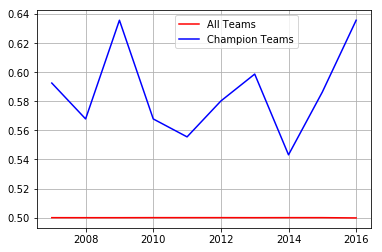

In [10]:
drawGrid(
    df_analysis_all_teams.mean()['yearID'],
    df_analysis_all_teams.mean()['WinRate'],
    df_analysis_champion_teams['yearID'],
    df_analysis_champion_teams['WinRate'],
    label_1,
    label_2
)

从上图可看出，夺取总冠军的队伍胜率均远超于联盟平均胜率

对比整体数据集全垒打数均值和总冠军数据集的全垒打数

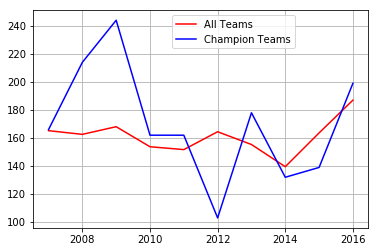

In [11]:
drawGrid(
    df_analysis_all_teams.mean()['yearID'],
    df_analysis_all_teams.mean()['HR'],
    df_analysis_champion_teams['yearID'],
    df_analysis_champion_teams['HR'],
    label_1,
    label_2
)

从上图可看出，夺取总冠军的队伍的全垒打数波动比联盟平均水平较大

对比整体数据集三振数均值和总冠军数据集的三振数

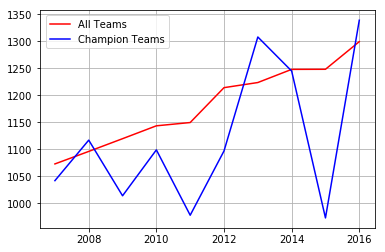

In [12]:
drawGrid(
    df_analysis_all_teams.mean()['yearID'],
    df_analysis_all_teams.mean()['SO'],
    df_analysis_champion_teams['yearID'],
    df_analysis_champion_teams['SO'],
    label_1,
    label_2
)

从上图可看出，夺取总冠军的队伍的三振数在多数情况下低于联盟平均水平，且波动较大

对比整体数据集盗垒数均值和总冠军数据集的盗垒数

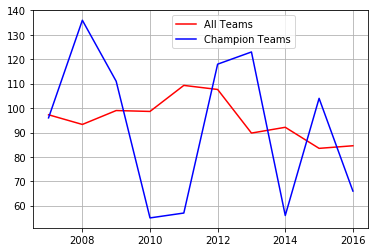

In [13]:
drawGrid(
    df_analysis_all_teams.mean()['yearID'],
    df_analysis_all_teams.mean()['SB'],
    df_analysis_champion_teams['yearID'],
    df_analysis_champion_teams['SB'],
    label_1,
    label_2
)

从上图可看出，夺取总冠军的队伍的盗垒数波动比联盟平均水平较大

### 3.3.3 针对问题【队伍LAN最近10年入选全明星的球员的数据有什么特点】的数据探索处理

In [14]:
# 计算打击率
def calculateHitRate(df_lan_batting_row):
    if df_lan_batting_row.AB == 0:
        return float(0)
    else:
        return float(df_lan_batting_row.H) / float(df_lan_batting_row.AB)
# 添加打击率列至整体数据集
df_batting['HitRate'] = df_batting.apply(calculateHitRate,axis=1)
# 队伍LAN所有球员的数据统计
df_lan_batting = df_batting[df_batting['teamID']=='LAN']
"""
由于全明星数据集只包含入选的球员ID数据
其对应的比赛数据保存与数据集df_batting中
故针对此问题，需首先将df_allstar和df_batting合并
"""
# 队伍LAN全明星球员的数据统计
df_lan_allstar_batting = df_allstar.merge(df_lan_batting,on=['yearID','teamID','playerID'],how='inner')
    
print len(df_lan_batting)
print len(df_lan_allstar_batting)

493
29


按年度分组两个数据集

In [15]:
df_analysis_lan_batting = df_lan_batting.groupby(['yearID'])['yearID','H','AB','HitRate','HR','SO','SB']
df_analysis_lan_allstar_batting = df_lan_allstar_batting.groupby(['yearID'])[['yearID','H','AB','HitRate','HR','SO','SB']].mean()

打印按年度统计的队伍LAN所有球员的数据集

In [16]:
printDiscrtption(df_analysis_lan_batting)

Minimum value by each year
        yearID  H  AB  HitRate  HR   SO   SB
yearID                                      
2007      2007  0   0      0.0   0  0.0  0.0
2008      2008  0   0      0.0   0  0.0  0.0
2009      2009  0   0      0.0   0  0.0  0.0
2010      2010  0   0      0.0   0  0.0  0.0
2011      2011  0   0      0.0   0  0.0  0.0
2012      2012  0   0      0.0   0  0.0  0.0
2013      2013  0   0      0.0   0  0.0  0.0
2014      2014  0   0      0.0   0  0.0  0.0
2015      2015  0   0      0.0   0  0.0  0.0
2016      2016  0   0      0.0   0  0.0  0.0
Maximum value by each year
        yearID    H   AB   HitRate  HR     SO    SB
yearID                                             
2007      2007  196  668  0.382353  20   89.0  64.0
2008      2008  176  606  0.395722  20  153.0  40.0
2009      2009  180  613  0.500000  31  139.0  34.0
2010      2010  157  602  1.000000  28  170.0  22.0
2011      2011  195  602  0.323920  39  159.0  40.0
2012      2012  158  556  0.333333  23  12

从上述统计项可看出，每年都会出现统计项为0的球员

打印按年度统计的队伍LAN全明星球员的数据集

In [17]:
print df_analysis_lan_allstar_batting

        yearID           H          AB   HitRate         HR         SO  \
yearID                                                                   
2007    2007.0   58.000000  201.666667  0.179582   6.333333  37.333333   
2008    2008.0  155.000000  553.000000  0.280289  13.000000  83.000000   
2009    2009.0   55.333333  202.666667  0.153898   3.333333  41.000000   
2010    2010.0   66.500000  225.250000  0.148083   7.750000  40.750000   
2011    2011.0  117.666667  386.666667  0.280284  16.666667  91.666667   
2012    2012.0   67.000000  230.500000  0.254813  11.500000  61.000000   
2013    2013.0   14.000000   77.000000  0.181818   1.000000  24.000000   
2014    2014.0   91.000000  322.500000  0.239825   4.750000  66.250000   
2015    2015.0   73.000000  308.800000  0.213963  14.400000  81.200000   
2016    2016.0   67.000000  224.333333  0.160576   8.666667  48.333333   

               SB  
yearID             
2007     7.000000  
2008    18.000000  
2009     2.666667  
2010     6.

从上述统计项结合整个LAN队伍的数据集可看出，全明星球员比队伍的其他球员的统计项多数要高

In [18]:
%pylab inline
label_1 = 'All Players'
label_2 = 'All Star Players'

Populating the interactive namespace from numpy and matplotlib


对比队伍LAN全部球员数据集的打击率均值和队伍LAN全明星球员的打击率

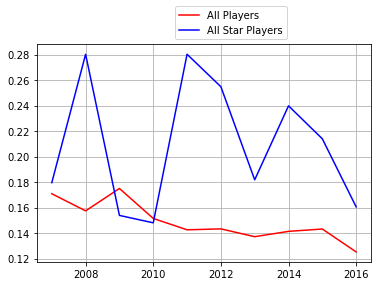

In [19]:
drawGrid(
    df_analysis_lan_batting.mean()['yearID'],
    df_analysis_lan_batting.mean()['HitRate'],
    df_analysis_lan_allstar_batting['yearID'],
    df_analysis_lan_allstar_batting['HitRate'],
    label_1,
    label_2
)

从上图可看出，队伍LAN入选全明星的球员比其他球员的打击率多数情况下要多

对比队伍LAN全部球员数据集的全垒打数均值和队伍LAN全明星球员的全垒打数

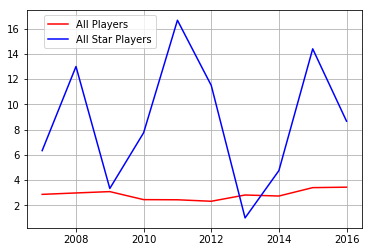

In [20]:
drawGrid(
    df_analysis_lan_batting.mean()['yearID'],
    df_analysis_lan_batting.mean()['HR'],
    df_analysis_lan_allstar_batting['yearID'],
    df_analysis_lan_allstar_batting['HR'],
    label_1,
    label_2
)

从上图可看出，队伍LAN入选全明星的球员比其他球员的全垒打数多数情况下要多

对比队伍LAN全部球员数据集的三振数均值和队伍LAN全明星球员的三振数

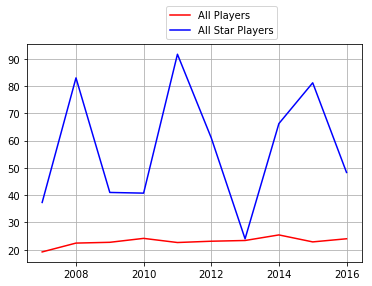

In [21]:
drawGrid(
    df_analysis_lan_batting.mean()['yearID'],
    df_analysis_lan_batting.mean()['SO'],
    df_analysis_lan_allstar_batting['yearID'],
    df_analysis_lan_allstar_batting['SO'],
    label_1,
    label_2
)

从上图可看出，队伍LAN入选全明星的球员比其他球员的三振数多数情况下要多

对比队伍LAN全部球员数据集的盗垒数均值和队伍LAN全明星球员的盗垒数

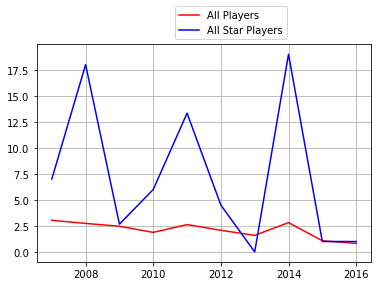

In [22]:
drawGrid(
    df_analysis_lan_batting.mean()['yearID'],
    df_analysis_lan_batting.mean()['SB'],
    df_analysis_lan_allstar_batting['yearID'],
    df_analysis_lan_allstar_batting['SB'],
    label_1,
    label_2
)

从上图可看出，队伍LAN入选全明星的球员比其他球员的盗垒数多数情况下要多，但也出现几乎相同的情况

队伍LAN每年入选全明星的球员所占比例

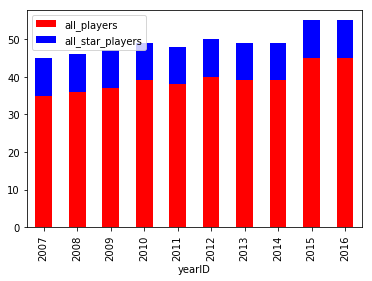

In [23]:
def bulidYearRdsDf(df_lan_allstar_batting,df_analysis_lan_allstar_batting):
    df_year_rds = pd.DataFrame(data={
            'all_star_players':df_analysis_lan_allstar_batting.count()['yearID'],
            'all_players':df_analysis_lan_batting.count()['yearID']-df_analysis_lan_allstar_batting.count()['yearID']
            
        }
    )
    return df_year_rds

df_year_rds = bulidYearRdsDf(df_lan_allstar_batting,df_analysis_lan_allstar_batting)
#按比例画出各年份的堆积图
df_year_rds.plot(kind='bar', stacked=True, color=['red', 'blue'])

从上图可看出，队伍LAN入选全明星的球员占队伍总球员数比例较为平均

# 4 结论阶段

## 4.1 问题探索结论

### 4.1.1 针对问题【最近10年夺取总冠军的队伍的数据有什么特点】的探索结论

    1.夺取总冠军的队伍胜率均远超于联盟平均胜率
    2.全垒打数不会对夺取总冠军的产生较大影响
    3.夺取总冠军的队伍的三震数多数情况下低于联盟平均水平
    4.盗垒数不会对夺取总冠军的产生较大影响

### 4.1.2 针对问题【队伍LAN最近10年入选全明星的球员的数据有什么特点】的探索结论


    1.队伍LAN的全明星球员的打击率在多数情况下高于队伍平均水平
    2.队伍LAN的全明星球员的全垒打数在多数情况下高于队伍平均水平
    3.队伍LAN的全明星球员的三震数在多数情况下高于队伍平均水平
    4.队伍LAN的全明星球员的盗垒数在多数情况下高于队伍平均水平
    5.队伍LAN的平均每年入选全明星的球员数目相对稳定

## 4.2 结论性质

### 4.2.1 针对问题【最近10年夺取总冠军的队伍的数据有什么特点】的结论性质

此结论只是在基于主要统计项所得出，而从已探索的统计项已可知，并不代表夺取总冠军的队伍的所有统计项均高于当年的联盟平均水平

而且，此研究只基于最近10年的数据得出，且由于多数统计项的波动比联盟水平要大，

所以，此研究的结论，只是可以得出在主要数据项上的排名，并不是决定最近10年夺取总冠军的队伍主要因素

如统计更多数据项，将可对问题得出更加严谨的结论

### 4.2.2 针对问题【队伍LAN最近10年入选全明星的球员的数据有什么特点】的结论性质

此结论在已探索的统计项可知，对于队伍LAN来说，

其入选全明星的球员，其数据项的统计在多数情况下都优于队伍的平均水平

而虽然，此研究只基于最近10年的数据得出，

但根据对全明星赛的理解，其处于队伍较优水平的球员是入选的重要因素，

所以，可以推断出，在之前年份或其他队伍中，其入选全明星的球员的数据项应在较多数情况下优于当年的队伍平均水平

如可增大研究年份和研究的队伍，可加强此结论的说服性